In [2]:
import pandas as pd

df = pd.read_csv('train.csv')

In [3]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [4]:
df[['day', 'month', 'year']] = df['week'].str.split('/', expand=True)

In [5]:
df.drop('week', axis=1, inplace=True)

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X, y = df.drop('units_sold', axis=1), df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [8]:
model.score(X_test, y_test)

0.7789579088228198

In [11]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)

26.930781424827764


c:\Users\kevor\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [12]:
df.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

(array([6.2965e+04, 4.6222e+04, 1.9488e+04, 8.8130e+03, 4.7530e+03,
        2.6830e+03, 1.6000e+03, 1.0480e+03, 6.7200e+02, 4.8500e+02,
        3.2700e+02, 2.2500e+02, 1.7900e+02, 1.2700e+02, 8.4000e+01,
        8.3000e+01, 6.8000e+01, 5.0000e+01, 4.7000e+01, 2.3000e+01,
        2.6000e+01, 2.5000e+01, 1.5000e+01, 2.0000e+01, 1.8000e+01,
        1.1000e+01, 1.7000e+01, 7.0000e+00, 7.0000e+00, 7.0000e+00,
        8.0000e+00, 3.0000e+00, 4.0000e+00, 2.0000e+00, 5.0000e+00,
        3.0000e+00, 3.0000e+00, 4.0000e+00, 3.0000e+00, 4.0000e+00,
        0.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        5.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

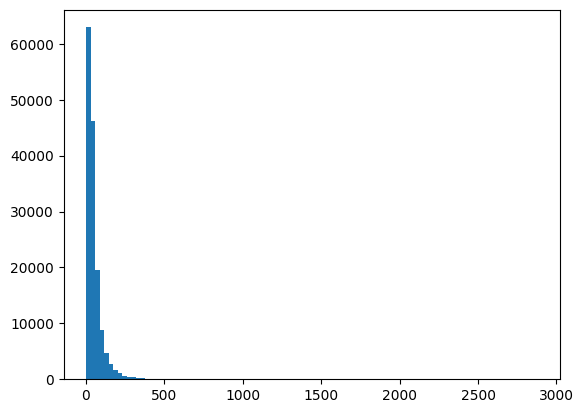

In [13]:
import matplotlib.pyplot as plt

plt.hist(df.units_sold, bins=100)

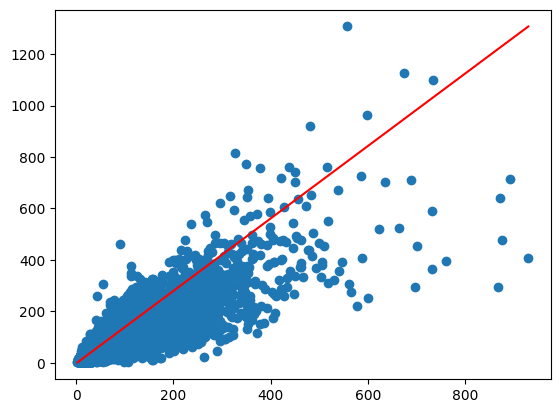

In [16]:
import numpy as np
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color='red')


In [17]:
df.drop('record_ID', axis=1, inplace=True)

In [18]:
df = df.join(pd.get_dummies(df['store_id'], prefix='store')).drop('store_id', axis=1)
df = df.join(pd.get_dummies(df['sku_id'], prefix='item')).drop('sku_id', axis=1)

In [19]:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
X, y = df.drop('units_sold', axis=1), df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [21]:
model.score(X_test, y_test)

0.817893859011096

In [22]:
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

c:\Users\kevor\anaconda3\envs\ML\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [23]:
rmse

np.float64(24.444083606603733)

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 20],
    'min_samples_split': [2,3]
}

model = RandomForestRegressor(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(model, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'min_samples_split': [2, 3], 'n_estimators': [10, 20]},
             verbose=2)

In [30]:
best_model = grid_search.best_estimator_

In [31]:
grid_search.best_params_

{'min_samples_split': 3, 'n_estimators': 20}

In [32]:
best_model.score(X_test, y_test)

0.8103223989638325